In [0]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==2.0.0-beta1

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 348.9MB 46kB/s 
     |████████████████████████████████| 3.1MB 26.7MB/s 
     |████████████████████████████████| 501kB 42.3MB/s 


# Classification with caps

Mainly fork from [Capsule-Network Github repository](https://github.com/TheAILearner/Capsule-Network/blob/master/Capsule%20Network.ipynb)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files

import tensorflow as tf 
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
def history_show(history):
    plt.figure()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
IMAGE_SHAPE = (28, 28)

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images /255
train_images = train_images.reshape(*train_images.shape, 1)
train_labels = to_categorical(train_labels)

test_images = test_images /255
test_images = test_images.reshape(*test_images.shape, 1)
unenc_test_labels = test_labels.copy()
test_labels = to_categorical(test_labels)

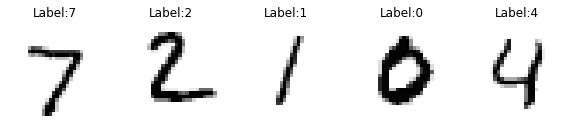

In [0]:
n_samples = 5

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = test_images[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(unenc_test_labels[index]))
    plt.axis("off")

plt.show()

In [0]:
def build_model_CNN():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

    return model

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/16
48000/48000 [==============================] - 7s 148us/sample - loss: 0.5564 - acc: 0.8569 - val_loss: 0.1496 - val_acc: 0.9581
Epoch 2/16
48000/48000 [==============================] - 1s 25us/sample - loss: 0.1246 - acc: 0.9628 - val_loss: 0.0926 - val_acc: 0.9741
Epoch 3/16
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0822 - acc: 0.9758 - val_loss: 0.0724 - val_acc: 0.9794
Epoch 4/16
48000/48000 [==============================] - 1s 25us/sample - loss: 0.0636 - acc: 0.9814 - val_loss: 0.0653 - val_acc: 0.9815
Epoch 5/16
48000/48000 [==============================] - 1s 25us/sample - loss: 0.0553 - acc: 0.9834 - val_loss: 0.0565 - val_acc: 0.9830
Epoch 6/16
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0440 - acc: 0.9867 - val_loss: 0.0527 - val_acc: 0.9850
Epoch 7/16
48000/4800

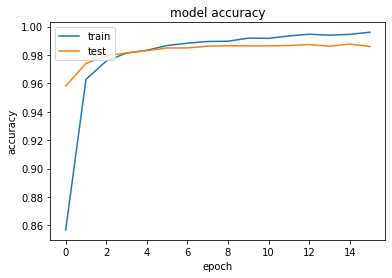

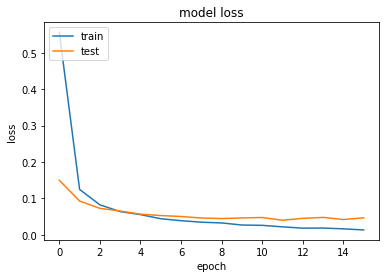

In [0]:
model = build_model_CNN()
history = model.fit(train_images, train_labels, epochs=16, batch_size=512, validation_split=0.2)
print(model.evaluate(test_images, test_labels, verbose=0))
history_show(history)

In [0]:
input_shape = layers.Input(shape=(28,28,1))  # size of input image is 28*28
# a convolution layer output shape = 20*20*256
conv1 = layers.Conv2D(256, (9,9), activation = 'relu', padding = 'valid')(input_shape)

# convolution layer with stride 2 and 256 filters of size 9*9
conv2 = layers.Conv2D(256, (9,9), strides = 2, padding = 'valid')(conv1)
 
# reshape into 1152 capsules of 8 dimensional vectors
reshaped = layers.Reshape((6*6*32,8))(conv2)
 
def squash(inputs):
    # take norm of input vectors
    squared_norm = K.sum(K.square(inputs), axis = -1, keepdims = True)
 
    # use the formula for non-linear function to return squashed output
    return ((squared_norm/(1+squared_norm))/(K.sqrt(squared_norm+K.epsilon())))*inputs
    
# squash the reshaped output to make length of vector b/w 0 and 1
squashed_output = layers.Lambda(squash)(reshaped)

class DigitCapsuleLayer(layers.Layer):
    # creating a layer class in keras
    def __init__(self, **kwargs):
        super(DigitCapsuleLayer, self).__init__(**kwargs)
        self.kernel_initializer = initializers.get('glorot_uniform')
    
    def build(self, input_shape): 
        # initialize weight matrix for each capsule in lower layer
        self.W = self.add_weight(shape = [10, 6*6*32, 16, 8], 
                                 initializer = self.kernel_initializer, 
                                 name = 'weights')
        self.built = True
    
    def call(self, inputs):
        inputs = K.expand_dims(inputs, 1)
        inputs = K.tile(inputs, [1, 10, 1, 1])
        # matrix multiplication b/w previous layer output and weight matrix
        inputs = K.map_fn(lambda x: K.batch_dot(x, self.W, [2, 3]), elems=inputs)
        b = tf.zeros(shape = [K.shape(inputs)[0], 10, 6*6*32])
        
    # routing algorithm with updating coupling coefficient c, using scalar product b/w input capsule and output capsule
        for i in range(3-1):
            c = tf.nn.softmax(b, axis=1)
            s = K.batch_dot(c, inputs, [2, 2])
            v = squash(s)
            b = b + K.batch_dot(v, inputs, [2,3])
            
        return v 

    def compute_output_shape(self, input_shape):
        return tuple([None, 10, 16])

def output_layer(inputs):
    return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())

digit_caps = DigitCapsuleLayer()(squashed_output)
outputs = layers.Lambda(output_layer)(digit_caps)

def mask(outputs):
    if type(outputs) != list:  # mask at test time
        norm_outputs = K.sqrt(K.sum(K.square(outputs), -1) + K.epsilon())
        y  = K.one_hot(indices=K.argmax(norm_outputs, 1), num_classes = 10)
        y = layers.Reshape((10,1))(y)
        return layers.Flatten()(y*outputs)
 
    else:    # mask at train time
        y = layers.Reshape((10,1))(outputs[1])
        masked_output = y*outputs[0]
        return layers.Flatten()(masked_output)
    
inputs = layers.Input(shape = (10,))
masked = layers.Lambda(mask)([digit_caps, inputs])
masked_for_test = layers.Lambda(mask)(digit_caps)
 
decoded_inputs = layers.Input(shape = (16*10,))
dense1 = layers.Dense(512, activation = 'relu')(decoded_inputs)
dense2 = layers.Dense(1024, activation = 'relu')(dense1)
decoded_outputs = layers.Dense(784, activation = 'sigmoid')(dense2)
decoded_outputs = layers.Reshape((28,28,1))(decoded_outputs)

def loss_fn(y_true, y_pred):
 
    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + 0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))
 
    return K.mean(K.sum(L, 1))

In [0]:
decoder = models.Model(decoded_inputs, decoded_outputs)
model = models.Model([input_shape,inputs],[outputs,decoder(masked)])
test_model = models.Model(input_shape,[outputs,decoder(masked_for_test)])

model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss=[loss_fn,'mse'],loss_weights = [1. ,0.0005],
              metrics=['accuracy'])

history = model.fit([train_images, train_labels],
                    [train_labels, train_images], 
                    batch_size = 128, 
                    epochs = 12, 
                    validation_split = 0.10)
 
model.evaluate([test_images, test_labels],[test_labels, test_images])

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 352s 7ms/sample - loss: 0.8095 - lambda_5_loss: 0.8094 - model_3_loss: 0.1458 - lambda_5_accuracy: 0.1130 - model_3_accuracy: 0.7861 - val_loss: 0.8095 - val_lambda_5_loss: 0.8094 - val_model_3_loss: 0.0675 - val_lambda_5_accuracy: 0.1420 - val_model_3_accuracy: 0.8028
Epoch 2/12
54000/54000 [==============================] - 354s 7ms/sample - loss: 0.4280 - lambda_5_loss: 0.4279 - model_3_loss: 0.0673 - lambda_5_accuracy: 0.5396 - model_3_accuracy: 0.8037 - val_loss: 0.0718 - val_lambda_5_loss: 0.0717 - val_model_3_loss: 0.0664 - val_lambda_5_accuracy: 0.9458 - val_model_3_accuracy: 0.8039
Epoch 3/12
54000/54000 [==============================] - 351s 6ms/sample - loss: 0.0609 - lambda_5_loss: 0.0608 - model_3_loss: 0.0659 - lambda_5_accuracy: 0.9520 - model_3_accuracy: 0.8041 - val_loss: 0.0378 - val_lambda_5_loss: 0.0378 - val_model_3_loss: 0.0645 - val_lambda_5_accuracy: 0.971

[0.016368528852472083, 0.016317755, 0.052330896, 0.9866, 0.7950278]

In [0]:
model.save('mnist_capsnet.h5')
files.download('mnist_capsnet.h5')

In [0]:
print(history.history.keys())

dict_keys(['loss', 'lambda_5_loss', 'model_3_loss', 'lambda_5_accuracy', 'model_3_accuracy', 'val_loss', 'val_lambda_5_loss', 'val_model_3_loss', 'val_lambda_5_accuracy', 'val_model_3_accuracy'])


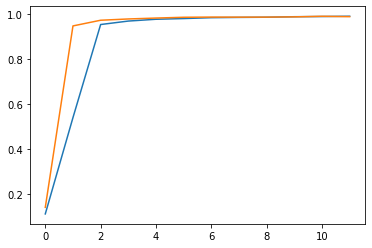

In [0]:
plt.plot(history.history['lambda_5_accuracy'], label='train')
plt.plot(history.history['val_lambda_5_accuracy'], label='test')
plt.show()

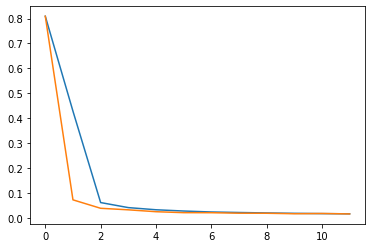

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

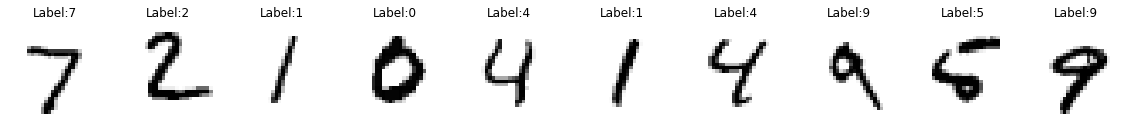

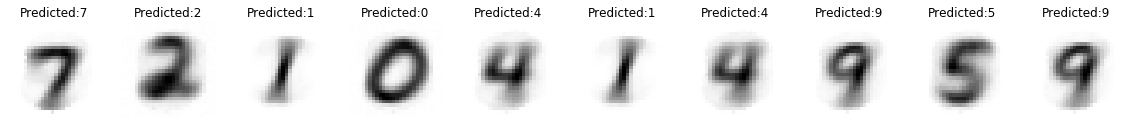

In [0]:
label_predicted, image_predicted = model.predict([test_images, test_labels])

n_samples = 10

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = test_images[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(unenc_test_labels[index]))
    plt.axis("off")

plt.show()

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = image_predicted[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Predicted:" + str(np.argmax(label_predicted[index])))
    plt.axis("off")

plt.show()